In [1]:
import pandas as pd
import numpy as np

columns = [
    'Round',
    'Match Name',
    'Team ID',
    'Team Name',
    'id',
    'Full Name',
    'pos',
    'team',
    'team_opponent',
    'pts',
    'On Field?'
]
basic_columns = [
    'Round',
    'Match Name',
    'Team Name',
    'Full Name',
    'pts',
]

In [2]:
df_all_league_match_data = pd.read_csv("outputs/all_matches_detailed.csv")
df_all_league_match_data = df_all_league_match_data.sort_values(['Round', 'Match Name', 'Team ID', 'On Field?', 'pos', 'pts'], ascending=[True, True, True, False, True, False])

In [3]:
# Finals not included
finals_not_included = df_all_league_match_data['Round'] <= 21
# Byes not included
byes_not_included = ~df_all_league_match_data['Round'].between(12,14)
# Only Donuts
only_donuts = (df_all_league_match_data['On Field?'] == True) & (df_all_league_match_data['pts'] == 0)
# Donuts excluded
donuts_not_included = (df_all_league_match_data['pts'] > 0)
# On Field
on_field = (df_all_league_match_data['On Field?'] == True)

In [4]:
# All on field players for a selected team and round
df_all_league_match_data.loc[(df_all_league_match_data['Team Name'] == 'Fire The Worpedo') & (df_all_league_match_data['Round'] == 16), columns]

,Round,Match Name,Team ID,Team Name,id,Full Name,pos,team,team_opponent,pts,On Field?
1277,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,714,Dane Rampe,DEF,SYD,ESS,117,True
1276,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,221,Adam Saad,DEF,ESS,SYD,86,True
1280,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,607,Brandon Ellis,DEF,RIC,GCS,80,True
1278,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,708,Callum Mills,DEF,SYD,ESS,60,True
1279,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,380,Jeremy Finlayson,DEF,GWS,BRL,21,True
1289,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,481,Tom McDonald,FWD,MEL,CAR,139,True
1292,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,426,Jarman Impey,FWD,HAW,COL,90,True
1293,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,455,James Worpel,FWD,HAW,COL,71,True
1291,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,372,Jeremy Cameron,FWD,GWS,BRL,64,True
1290,16,Casting Crouch vs Fire The Worpedo,11070,Fire The Worpedo,102,Zac Fisher,FWD,CAR,MEL,48,True


In [5]:
donut_list = df_all_league_match_data.loc[(finals_not_included) & (byes_not_included) & (only_donuts), columns].sort_values(['Round', 'Team ID'])

donut_pivot = donut_list.pivot_table(index='Team Name', values='pts', aggfunc='count').sort_values('pts', ascending=False)
donut_pivot

,pts
Team Name,
DEVQON.1,4
Casting Crouch,2
Fire The Worpedo,2
Salt&VinegarCripps,2
Swimming n Titch,2
TryingAnewStratton,2
Barbeques Treloar,1


In [6]:
donut_list[['Round', 'Team Name', 'Match Name', 'Full Name']]

,Round,Team Name,Match Name,Full Name
3041,4,Fire The Worpedo,Fire The Worpedo vs Swimming n Titch,Dayne Beams
3526,7,Swimming n Titch,Swimming n Titch vs Casting Crouch,Josh Kelly
3612,7,DEVQON.1,TryingAnewStratton vs DEVQON.1,Wayne Milera
3857,8,Barbeques Treloar,Barbeques Treloar vs Fire The Worpedo,Joel Selwood
266,10,DEVQON.1,Fire The Worpedo vs DEVQON.1,Christian Salem
250,10,Casting Crouch,Casting Crouch vs Salt&VinegarCripps,Matt Crouch
364,11,Swimming n Titch,Fire The Worpedo vs Swimming n Titch,Rhys Stanley
443,11,DEVQON.1,DEVQON.1 vs Salt&VinegarCripps,Christian Salem
1337,16,DEVQON.1,Man of Steele vs DEVQON.1,Travis Boak
1288,16,Fire The Worpedo,Casting Crouch vs Fire The Worpedo,Max Gawn


In [7]:
# Number of players to play on field during the season
unique_player_data = df_all_league_match_data.loc[(finals_not_included) & (on_field), columns]
unique_player_count_pivot = unique_player_data.pivot_table(index='Team Name', values=('id'), aggfunc=lambda x: len(x.unique())).sort_values(by=['id'], ascending=False)
unique_player_count_pivot

,id
Team Name,
Swimming n Titch,68
Salt&VinegarCripps,64
Barbeques Treloar,61
TryingAnewStratton,61
Casting Crouch,52
DEVQON.1,50
Fire The Worpedo,48
Man of Steele,47


In [8]:
# Selected Team Summary
selected_team = 'Barbeques Treloar'
selected_team_data = unique_player_data.loc[unique_player_data['Team Name'] == selected_team]
unique_player_pivot = selected_team_data.pivot_table(index=('Full Name'), values=('pts'), aggfunc=(np.count_nonzero, np.average, np.sum)).sort_values('count_nonzero', ascending=False)
unique_player_pivot.round({'average': 1, 'count_nonzero': 0, 'sum': 0}).head(20)

,average,count_nonzero,sum
Full Name,,,
Lachie Hunter,94.6,20.0,1891.0
Ben Cunnington,98.6,20.0,2070.0
Nat Fyfe,115.3,18.0,2191.0
Tom Hawkins,86.2,17.0,1466.0
Joel Selwood,83.1,17.0,1495.0
Harris Andrews,78.1,16.0,1327.0
Sam Petrevski-Seton,83.6,15.0,1254.0
Nick Haynes,82.1,14.0,1232.0
Nick Vlastuin,94.5,14.0,1323.0


In [9]:
# Top 15 Most Carried on field Players (played 7 or more games)
most_carried_pivot = unique_player_data.pivot_table(index=('Team Name', 'Full Name'), values=('pts'), aggfunc=(np.count_nonzero, np.average, np.sum)).sort_values('average')
most_carried_pivot = most_carried_pivot.reset_index()
most_carried_pivot = most_carried_pivot[most_carried_pivot['count_nonzero'] >= 7]
most_carried_pivot.round({'average': 1, 'count_nonzero': 0, 'sum': 0}).head(15)

,Team Name,Full Name,average,count_nonzero,sum
83,Salt&VinegarCripps,Lance Franklin,61.8,9.0,618.0
108,Casting Crouch,Bradley Hill,65.8,7.0,526.0
129,DEVQON.1,Aliir Aliir,68.6,7.0,480.0
130,Salt&VinegarCripps,Toby McLean,68.7,10.0,687.0
132,Barbeques Treloar,Tom Papley,68.9,7.0,482.0
136,DEVQON.1,Wayne Milera,69.3,14.0,1039.0
137,Fire The Worpedo,Mitch Wallis,69.8,10.0,837.0
154,Barbeques Treloar,Jack Gunston,71.6,14.0,1074.0
162,Salt&VinegarCripps,Kade Simpson,72.6,9.0,653.0
165,Fire The Worpedo,Dayne Beams,73.2,9.0,732.0


In [10]:
# Top 15 Most Carried players (including on bench)
unique_player_data_inc_bench = df_all_league_match_data.loc[(finals_not_included), columns]

most_carried_pivot_inc_bench = unique_player_data_inc_bench.pivot_table(index=('Team Name', 'Full Name'), values=('pts'), aggfunc=('count', np.average, np.sum)).sort_values('average')
most_carried_pivot_inc_bench = most_carried_pivot_inc_bench.reset_index()
most_carried_pivot_inc_bench = most_carried_pivot_inc_bench[most_carried_pivot_inc_bench['count'] >= 7]
most_carried_pivot_inc_bench.round({'average': 1, 'count_nonzero': 0, 'sum': 0}).head(15)

,Team Name,Full Name,average,count,sum
9,Fire The Worpedo,Jayden Short,16.5,10.0,165.0
17,Salt&VinegarCripps,Lance Franklin,29.4,21.0,618.0
20,Casting Crouch,Trent Cotchin,33.0,7.0,231.0
21,TryingAnewStratton,Taylor Adams,34.4,21.0,723.0
22,DEVQON.1,Zach Tuohy,34.7,13.0,451.0
23,Casting Crouch,Sam Menegola,34.9,21.0,732.0
38,Barbeques Treloar,Jack Riewoldt,39.1,10.0,391.0
42,TryingAnewStratton,Ollie Wines,41.0,21.0,861.0
43,Barbeques Treloar,Cameron Ellis-Yolmen,41.5,14.0,581.0
57,Salt&VinegarCripps,Connor Blakely,48.5,20.0,970.0


In [11]:
# Who played for the most teams?
player_average_by_team = df_all_league_match_data.pivot_table(index=("Full Name"), values="Team Name", aggfunc=lambda x: len(x.unique())).sort_values('Team Name', ascending=False)
player_average_by_team.head(15)

,Team Name
Full Name,
Blake Hardwick,5
Darcy Byrne-Jones,4
Ben Brown,4
Jack Newnes,4
Josh J. Kennedy,4
Jack Darling,4
Ed Curnow,4
Tom Phillips,4
Paddy Ryder,4


In [12]:
match_data = df_all_league_match_data.loc[(finals_not_included) & (on_field)]
match_pivot = match_data.pivot_table(index=("Team Name", "Round"), values="pts", aggfunc=("sum", np.count_nonzero))
match_score_list = match_pivot.reset_index()

In [13]:
# All on field players for a selected team and round
match_data.loc[(match_data['Team Name'] == 'Salt&VinegarCripps') & (match_data['Round'] == 17), ['Match Name', 'Full Name', 'pts']]

,Match Name,Full Name,pts
1431,Casting Crouch vs Salt&VinegarCripps,Jeremy McGovern,94
1433,Casting Crouch vs Salt&VinegarCripps,Connor Blakely,86
1430,Casting Crouch vs Salt&VinegarCripps,Brad Sheppard,73
1432,Casting Crouch vs Salt&VinegarCripps,Jason Johannisen,44
1434,Casting Crouch vs Salt&VinegarCripps,Dan Houston,0
1445,Casting Crouch vs Salt&VinegarCripps,Luke Dahlhaus,74
1447,Casting Crouch vs Salt&VinegarCripps,Justin Westhoff,71
1444,Casting Crouch vs Salt&VinegarCripps,Kyle Langford,59
1446,Casting Crouch vs Salt&VinegarCripps,Toby McLean,16
1443,Casting Crouch vs Salt&VinegarCripps,Darcy Moore,13


In [14]:
# Highest score
highest_score = match_score_list[match_score_list['sum'] == max(match_score_list['sum'])]
highest_score

,Team Name,Round,count_nonzero,sum
102,Man of Steele,19,18,1911


In [15]:
# Lowest score excluding byes
match_score_list_excluding_byes = match_score_list.loc[(~match_score_list['Round'].between(12,14))]
lowest_score = match_score_list_excluding_byes[match_score_list_excluding_byes['sum'] == min(match_score_list_excluding_byes['sum'])]
lowest_score

,Team Name,Round,count_nonzero,sum
121,Salt&VinegarCripps,17,16,1262


In [16]:
# Only Byes
only_byes = match_score_list['Round'].between(12,14)
bye_score_list = match_score_list.loc[(only_byes)]

In [17]:
# Highest Bye Score
highest_bye_score = bye_score_list[bye_score_list['sum'] == max(bye_score_list['sum'])]
highest_bye_score

,Team Name,Round,count_nonzero,sum
139,Swimming n Titch,14,17,1624


In [18]:
# Lowest Bye Score
lowest_bye_score = bye_score_list[bye_score_list['sum'] == min(bye_score_list['sum'])]
lowest_bye_score

,Team Name,Round,count_nonzero,sum
13,Barbeques Treloar,14,12,827


In [19]:
# bench_list
bench_list = df_all_league_match_data.loc[(finals_not_included) & (~on_field), columns]
# ignore zero scores
bench_list = bench_list.replace(0, np.NaN)
bench_list.loc[(bench_list['Team Name'] == 'Barbeques Treloar') & (bench_list['Round'] == 2)]

,Round,Match Name,Team ID,Team Name,id,Full Name,pos,team,team_opponent,pts,On Field?
2108,2,Barbeques Treloar vs Salt&VinegarCripps,8740,Barbeques Treloar,221,Adam Saad,DEF,ESS,STK,104.0,False
2111,2,Barbeques Treloar vs Salt&VinegarCripps,8740,Barbeques Treloar,54,Charlie Cameron,FWD,BRL,NTH,87.0,False
2110,2,Barbeques Treloar vs Salt&VinegarCripps,8740,Barbeques Treloar,218,Darcy Parish,FWD,ESS,STK,74.0,False
2109,2,Barbeques Treloar vs Salt&VinegarCripps,8740,Barbeques Treloar,786,Andrew Gaff,MID,WCE,GWS,NaN,False


In [20]:
# Bench utilisation
scoring_bench_player_count = bench_list.groupby(['Team Name'])['pts'].agg(['mean', 'count'])
scoring_bench_player_count = scoring_bench_player_count.reset_index().rename(columns = {'Team Name': 'Team Name', 'count': 'Scoring Players', 'mean': 'Average'})
scoring_bench_player_count['Utilisation'] = (scoring_bench_player_count['Scoring Players']/84) * 100
scoring_bench_player_count.sort_values(['Scoring Players', 'Average'], ascending=False)

,Team Name,Average,Scoring Players,Utilisation
4,Man of Steele,80.054545,55,65.476190
6,Swimming n Titch,78.230769,52,61.904762
2,DEVQON.1,81.000000,45,53.571429
3,Fire The Worpedo,81.309524,42,50.000000
0,Barbeques Treloar,79.486486,37,44.047619
5,Salt&VinegarCripps,77.378378,37,44.047619
1,Casting Crouch,86.171429,35,41.666667
7,TryingAnewStratton,77.678571,28,33.333333


In [21]:
def get_lowest_on_field_score_for_position(row):
    team_id = row['Team ID']
    round_id = row['Round']
    position = row['pos']
    comparison_player = df_all_league_match_data.loc[(df_all_league_match_data['Team ID'] == team_id) & (df_all_league_match_data['Round'] == round_id) & (df_all_league_match_data['pos'] == position) & (on_field) & (donuts_not_included) ]
    comparison_player = comparison_player.nsmallest(1, 'pts')
    comparison_player = comparison_player.iloc[0]
    return_data = {'Full Name': comparison_player['Full Name'], 'pts': comparison_player['pts']}
    return return_data

# Highest scoring bench players
bench_list_2 = df_all_league_match_data.loc[(finals_not_included) & (~on_field)]
bench_list_2['Played...'] = bench_list_2.apply(lambda row: get_lowest_on_field_score_for_position(row)['Full Name'], axis=1)
bench_list_2['Actually got...'] = bench_list_2.apply(lambda row: get_lowest_on_field_score_for_position(row)['pts'], axis=1)
bench_list_2['Diff'] = bench_list_2['pts'] - bench_list_2['Actually got...']
bench_list_2.nlargest(10, 'Diff')[['Round', 'Match Name', 'Team Name', 'Full Name', 'pts', 'Played...', 'Actually got...', 'Diff']]

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,Round,Match Name,Team Name,Full Name,pts,Played...,Actually got...,Diff
1492,17,Casting Crouch vs Salt&VinegarCripps,Casting Crouch,Robbie Tarrant,160,Jasper Pittard,33,127
2881,3,Fire The Worpedo vs DEVQON.1,Fire The Worpedo,Jeremy Cameron,163,Rhys Mathieson,46,117
3033,4,DEVQON.1 vs Salt&VinegarCripps,Salt&VinegarCripps,Marc Murphy,114,Callan Ward,4,110
1295,16,Casting Crouch vs Fire The Worpedo,Fire The Worpedo,Darcy Byrne-Jones,121,Jeremy Finlayson,21,100
2903,3,Casting Crouch vs Salt&VinegarCripps,Casting Crouch,Mitch Robinson,131,Willem Drew,36,95
1536,17,Man of Steele vs Swimming n Titch,Man of Steele,Shane Savage,112,Heath Shaw,20,92
3824,8,Man of Steele vs Casting Crouch,Man of Steele,Jamie Macmillan,90,Ryan Burton,6,84
1514,17,Fire The Worpedo vs DEVQON.1,DEVQON.1,Wayne Milera,114,Michael Hurley,32,82
371,11,Fire The Worpedo vs Swimming n Titch,Swimming n Titch,Jarryd Lyons,127,Jack Redden,46,81
1140,15,Man of Steele vs Casting Crouch,Casting Crouch,Jasper Pittard,125,Matthew Suckling,45,80


In [22]:
df_sc_player_list = pd.read_excel("inputs/2019_sc_player_list.xlsx")
df_sc_player_list['Full Name'] = df_sc_player_list['First Name'] + ' ' + df_sc_player_list['Last Name']
# df_sc_player_list

In [23]:
df_fanfooty_player_list = pd.read_csv('inputs/2019_fanfooty_player_list.csv', encoding = "ISO-8859-1")
df_fanfooty_player_list.rename(columns={
    'FanFooty player ID': 'fanfooty_player_id', 
    ' AFL player id': 'afl_player_id',
    ' first name (may include middle initial)': 'first_name',
    ' surname': 'surname', 
    ' AFL team': 'afl_team',
    ' AFL status (senior/rookie/long-term injured/AFL suspension/club suspension)': 'status',
    ' jumper number': 'jumper_number', 
    ' date of birth': 'birth_date', 
    ' height in cm': 'height', 
    ' weight in kg': 'weight',
    ' state of origin': 'state_of_origin', 
    ' recruited from': 'recruited_from', 
    ' games': 'game', 
    'goals': 'goals'}, inplace=True)
df_fanfooty_player_list['Full Name'] = df_fanfooty_player_list['first_name'] + ' ' + df_fanfooty_player_list['surname']
# df_fanfooty_player_list

In [24]:
merged_name_data = df_fanfooty_player_list.merge(df_sc_player_list,
                                                left_on='Full Name',
                                                right_on='Full Name',
                                                how='outer')
missing_avgs = merged_name_data[merged_name_data['Avg'].isnull()]
# missing_avgs.reset_index(inplace=True,drop='index')
missing_avgs[['fanfooty_player_id', 'afl_player_id', 'Full Name', 'SC Player ID']]
# merged_name_data.to_csv(r'outputs/merged.csv')

,fanfooty_player_id,afl_player_id,Full Name,SC Player ID
9,42316.0,293479.0,Cam Ellis-Yolmen,NaN
14,49062.0,1008159.0,Will Hamill,NaN
25,40030.0,270938.0,Tom T. Lynch,NaN
52,49046.0,1006100.0,Tom Berry,NaN
58,49140.0,1013532.0,Tom Fullarton,NaN
98,45139.0,298446.0,Josh Deluca,NaN
108,47044.0,998116.0,Patrick Kerr,NaN
111,47045.0,992276.0,Kym LeBois,NaN
124,45010.0,990423.0,Jarrod Pickett,NaN
125,43008.0,294624.0,Lachlan Plowman,NaN


In [25]:
#Fuzzy matching
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

dict_list = []
for index, row in missing_avgs.iterrows():
    match = match_name(row['Full Name'], df_sc_player_list['Full Name'], 60)
    dict_ = {}
    dict_.update({"fanfooty_player_id" : row['fanfooty_player_id']})
    dict_.update({"afl_player_id" : row['afl_player_id']})
    dict_.update({"SC Player ID" : row['SC Player ID']})
    dict_.update({"player_name" : row['Full Name']})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)

# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in missing_avgs['Full Name']:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, df_sc_player_list['Full Name'], 60)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"player_name" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
# merge_table
# merge_table.to_csv(r'outputs/matched_names')

df_matched_names = pd.read_csv(r'outputs/matched_names.csv')

C:\Users\Richa\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [26]:
df_combined_dataset = pd.read_csv('outputs/combined_dataset.csv')
df_combined_dataset[['fanfooty_player_id', 'afl_player_id', 'SC Player ID', 'Full Name', 'Matches', 'Avg']].sort_values(['Avg'], ascending=False).head(10)

,fanfooty_player_id,afl_player_id,SC Player ID,Full Name,Matches,Avg
13,43007,293957,153,Brodie Grundy,22.0,130.00
1,41056,290528,464,Max Gawn,21.0,128.38
18,43022,295467,748,Jack Macrae,22.0,123.18
6,42323,293535,77,Lachie Neale,22.0,121.27
20,41049,291570,243,Nat Fyfe,20.0,120.00
45,44002,296347,390,Josh Kelly,14.0,117.43
12,44030,990704,94,Patrick Cripps,20.0,117.10
2,46010,993834,734,Josh Dunkley,22.0,116.45
0,39610,270917,331,Patrick Dangerfield,21.0,115.19
34,44006,297373,726,Marcus Bontempelli,22.0,114.73


In [27]:
df_all_sc_scores = pd.read_csv('inputs/all_sc_scores_2019_post_gf_20191013-195627.csv', dtype={"Player ID": int, "null8": str})
df_all_sc_scores['Round'] = df_all_sc_scores['Round'].map(lambda x: x.lstrip('R'))
injury_tags = ['sore', 'injured', 'longterminjured','concussed']

def is_injured(df_tag):
    if (df_tag['SC'] < 80) and ((df_tag['Tag'] in injury_tags) or (df_tag['Tag 2'] in injury_tags)):
        return True
    else:
        return False

df_all_sc_scores['Injured'] = df_all_sc_scores.apply(is_injured, axis=1)
# All injured players
df_all_sc_scores.loc[(df_all_sc_scores['Injured'] == True) & (df_all_sc_scores['Year'] == 2019), ['Round', 'Year', 'Player ID', 'First Name', 'Surname', 'Team', 'SC', 'Tag', 'Tag 2', 'Injured']]

C:\Users\Richa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Round,Year,Player ID,First Name,Surname,Team,SC,Tag,Tag 2,Injured
79512,1,2019,261362,Alex,Rance,RI,36.0,longterminjured,job,True
79556,1,2019,1002220,Esava,Ratugolea,GE,33.0,sore,spearhead,True
79597,1,2019,1004998,Todd,Marshall,PA,48.0,concussed,spearhead,True
79618,1,2019,240370,Richard,Douglas,AD,46.0,injured,wing,True
79621,1,2019,1000932,Tom,Doedee,AD,56.0,longterminjured,guard,True
...,...,...,...,...,...,...,...,...,...,...
88451,PF,2019,270896,Trent,Cotchin,RI,68.0,sore,shovel,True
88459,PF,2019,990827,Jack,Graham,RI,36.0,sore,shovel,True
88464,PF,2019,295203,Nathan,Broad,RI,25.0,concussed,job,True
88481,PF,2019,1002220,Esava,Ratugolea,GE,61.0,sore,spearhead,True


In [28]:
df_match_data_with_fanfooty_id = pd.merge(df_all_league_match_data, df_combined_dataset, how='left', left_on='feed_id', right_on='afl_player_id')
df_match_data_with_fanfooty_id['player_round_year_id'] = df_match_data_with_fanfooty_id['feed_id'].astype(str) + '_' + df_match_data_with_fanfooty_id['Round'].astype(str) + '_' + "2019"
df_match_data_with_fanfooty_id
# df_match_data_with_fanfooty_id.to_csv(r'outputs/df_match_data_with_fanfooty_id.csv')

df_all_sc_scores['player_round_year_id'] = round(df_all_sc_scores['Player ID'], 0).astype(str) + '_' + df_all_sc_scores['Round'].astype(str) + '_' + df_all_sc_scores['Year'].astype(str)
# df_all_sc_scores.loc[(df_all_sc_scores['Injured'] == True) & (df_all_sc_scores['Year'] == 2019), ['player_round_year_id', 'Round', 'Year', 'Player ID', 'First Name', 'Surname', 'Team', 'SC', 'Tag', 'Tag 2', 'Injured']]
# df_all_sc_scores.to_csv(r'outputs/df_all_sc_scores.csv')

In [29]:
df_match_data_with_fanfooty_info = pd.merge(df_match_data_with_fanfooty_id, df_all_sc_scores, how='left', on='player_round_year_id')
# df_match_data_with_fanfooty_info.to_csv(r'outputs/df_match_data_with_fanfooty_info.csv')

In [30]:
def get_lowest_uninjured_on_field_score_for_position(row):
    team_id = row['Team ID']
    round_id = row['Round_x']
    position = row['pos']
    comparison_player = df_match_data_with_fanfooty_info.loc[(df_match_data_with_fanfooty_info['Team ID'] == team_id) & (df_match_data_with_fanfooty_info['Round_x'] == round_id) & (df_match_data_with_fanfooty_info['pos'] == position) & (df_match_data_with_fanfooty_info["Round_x"] <= 21) & (on_field) & (df_match_data_with_fanfooty_info['pts'] > 0) & (df_match_data_with_fanfooty_info['Injured'] == False) ]
    comparison_player = comparison_player.nsmallest(1, 'pts')
    comparison_player = comparison_player.iloc[0]
    return_data = {'Full Name': comparison_player['Full Name_x'], 'pts': comparison_player['pts']}
    return return_data

# Highest scoring bench players
bench_list_2 = df_match_data_with_fanfooty_info.loc[(df_match_data_with_fanfooty_info["Round_x"] <= 21) & (~on_field) & (df_match_data_with_fanfooty_info['pts'] > 0) & (df_match_data_with_fanfooty_info['Injured'] == False)]
bench_list_2['Played...'] = bench_list_2.apply(lambda row: get_lowest_uninjured_on_field_score_for_position(row)['Full Name'], axis=1)
bench_list_2['Actually got...'] = bench_list_2.apply(lambda row: get_lowest_uninjured_on_field_score_for_position(row)['pts'], axis=1)
bench_list_2['Diff'] = bench_list_2['pts'] - bench_list_2['Actually got...']
bench_list_2.nlargest(10, 'Diff')[['Round_x', 'Match Name', 'Team Name', 'Full Name_x', 'pts', 'Played...', 'Actually got...', 'Diff']]

C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,Round_x,Match Name,Team Name,Full Name_x,pts,Played...,Actually got...,Diff
2856,17,Casting Crouch vs Salt&VinegarCripps,Casting Crouch,Robbie Tarrant,160,Jasper Pittard,33,127
436,3,Fire The Worpedo vs DEVQON.1,Fire The Worpedo,Jeremy Cameron,163,Rhys Mathieson,46,117
2702,16,Casting Crouch vs Fire The Worpedo,Fire The Worpedo,Darcy Byrne-Jones,121,Jeremy Finlayson,21,100
393,3,Casting Crouch vs Salt&VinegarCripps,Casting Crouch,Mitch Robinson,131,Willem Drew,36,95
2922,17,Man of Steele vs Swimming n Titch,Man of Steele,Shane Savage,112,Heath Shaw,20,92
1869,11,Fire The Worpedo vs Swimming n Titch,Swimming n Titch,Jarryd Lyons,127,Jack Redden,46,81
2548,15,Man of Steele vs Casting Crouch,Casting Crouch,Jasper Pittard,125,Matthew Suckling,45,80
2966,17,TryingAnewStratton vs Barbeques Treloar,TryingAnewStratton,Toby Greene,138,Jy Simpkin,61,77
394,3,Casting Crouch vs Salt&VinegarCripps,Casting Crouch,Shaun Higgins,133,Trent Cotchin,57,76
128,1,Swimming n Titch vs DEVQON.1,DEVQON.1,Jamie Macmillan,124,Shane Savage,51,73


In [31]:
# List of Injuries
df_injury_list = df_match_data_with_fanfooty_info[(df_match_data_with_fanfooty_info['Round_x'] <= 21) & (df_match_data_with_fanfooty_info['On Field?'] == True) & (df_match_data_with_fanfooty_info['Injured'] == True)]
df_injury_list[['Team Name', 'Round_x', 'Full Name_x', 'pts', 'Match Name', 'Fanfooty Match ID']].head(10)
# df_injury_list[['Team Name', 'Round_x', 'Full Name_x', 'pts', 'Match Name', 'Fanfooty Match ID']].to_csv('outputs/injury_list.csv')


,Team Name,Round_x,Full Name_x,pts,Match Name,Fanfooty Match ID
30,Fire The Worpedo,1,Jack Darling,75,Barbeques Treloar vs Fire The Worpedo,http://live.fanfooty.com.au/game/matchcentre.h...
92,Swimming n Titch,1,Alex Rance,36,Swimming n Titch vs DEVQON.1,http://live.fanfooty.com.au/game/matchcentre.h...
113,DEVQON.1,1,Tom Doedee,56,Swimming n Titch vs DEVQON.1,http://live.fanfooty.com.au/game/matchcentre.h...
148,TryingAnewStratton,1,Liam Shiels,54,TryingAnewStratton vs Salt&VinegarCripps,http://live.fanfooty.com.au/game/matchcentre.h...
192,Salt&VinegarCripps,2,Marc Murphy,51,Barbeques Treloar vs Salt&VinegarCripps,http://live.fanfooty.com.au/game/matchcentre.h...
201,Barbeques Treloar,2,Andrew McGrath,74,Barbeques Treloar vs Salt&VinegarCripps,http://live.fanfooty.com.au/game/matchcentre.h...
207,Barbeques Treloar,2,Jack Riewoldt,33,Barbeques Treloar vs Salt&VinegarCripps,http://live.fanfooty.com.au/game/matchcentre.h...
332,Swimming n Titch,2,Luke Ryan,78,TryingAnewStratton vs Swimming n Titch,http://live.fanfooty.com.au/game/matchcentre.h...
334,Swimming n Titch,2,Steven May,23,TryingAnewStratton vs Swimming n Titch,http://live.fanfooty.com.au/game/matchcentre.h...
355,Salt&VinegarCripps,3,Dan Houston,72,Casting Crouch vs Salt&VinegarCripps,http://live.fanfooty.com.au/game/matchcentre.h...


In [32]:
# Who had the most injuries?
most_total_injuries = df_injury_list.groupby(['Team Name'])['pts'].agg(['mean', 'count']).sort_values('count', ascending=False)
most_total_injuries

,mean,count
Team Name,,
Barbeques Treloar,55.210526,19
Salt&VinegarCripps,42.000000,18
DEVQON.1,54.470588,17
Man of Steele,53.571429,14
Fire The Worpedo,47.384615,13
Swimming n Titch,45.909091,11
Casting Crouch,53.200000,10
TryingAnewStratton,43.571429,7


In [33]:
# Who had the most injuries in a supercoach match?
df_most_injuries_in_game = df_injury_list.groupby(['Team Name', 'Round_x'])['pts'].agg(['mean', 'count']).sort_values(['count', 'mean'], ascending=[False, True])
df_most_injuries_in_game.reset_index().head(10)

,Team Name,Round_x,mean,count
0,Salt&VinegarCripps,17,9.666667,3
1,Casting Crouch,9,53.333333,3
2,Fire The Worpedo,6,56.666667,3
3,Barbeques Treloar,20,63.333333,3
4,Barbeques Treloar,4,21.000000,2
5,Swimming n Titch,17,25.000000,2
6,Fire The Worpedo,15,34.000000,2
7,Man of Steele,16,39.000000,2
8,Barbeques Treloar,15,40.000000,2
9,Man of Steele,8,42.000000,2


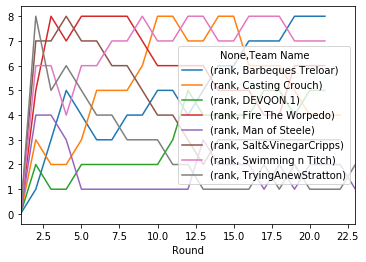

In [130]:
# Ladder position change throughout season
df_combined_weekly_ladders = pd.read_csv("inputs/weekly_ladder - with finals.csv")
df_combined_weekly_ladders['rank'] = df_combined_weekly_ladders['rank'].map(lambda x: x[:1])
df_combined_weekly_ladders['rank'] = pd.to_numeric(df_combined_weekly_ladders['rank'])
df_grouped_ladder = pd.pivot_table(df_combined_weekly_ladders, index=['Round'], columns=['Team Name'], values=['rank'])
plot = df_grouped_ladder.plot(kind='line')

In [132]:
# Fixture Difficulty
df_fixture = pd.read_csv("inputs/2019_sc_fixture - with finals.csv")
# df_fixture = df_fixture[df_fixture['Round'] < 22]
df_fixture_team_one = df_fixture
df_fixture_team_one = df_fixture_team_one.rename(columns={"Team One ID": "ID", "Team One Team Name": "Team Name", "Team One Points": "Points", "Team One Final": "Final", "Team Two ID": "Opponent ID", "Team Two Team Name": "Opponent Team Name", "Team Two Final":"Opponent Final", "Team Two Points":"Opponent Points"})
df_fixture_team_two = df_fixture
df_fixture_team_two = df_fixture_team_two.rename(columns={"Team Two ID": "ID", "Team Two Team Name": "Team Name", "Team Two Points": "Points", "Team Two Final": "Final", "Team One ID": "Opponent ID", "Team One Team Name": "Opponent Team Name", "Team One Final":"Opponent Final", "Team One Points":"Opponent Points"})
df_fixture_combined = pd.concat([df_fixture_team_one, df_fixture_team_two], sort=True)
df_fixture_combined

,Final,Game Number,ID,Opponent Final,Opponent ID,Opponent Points,Opponent Team Name,Points,Round,Team Name
0,18,1,344,18,831,1667,Salt&VinegarCripps,1627,1,TryingAnewStratton
1,18,2,2501,18,7061,1742,DEVQON.1,1595,1,Swimming n Titch
2,18,3,8740,18,11070,1499,Fire The Worpedo,1640,1,Barbeques Treloar
3,18,4,397,18,25252,1718,Casting Crouch,1660,1,Man of Steele
4,18,1,344,18,2501,1547,Swimming n Titch,1526,2,TryingAnewStratton
...,...,...,...,...,...,...,...,...,...,...
82,18,3,25252,18,2501,1777,Swimming n Titch,1618,21,Casting Crouch
83,18,4,397,18,8740,1624,Barbeques Treloar,1559,21,Man of Steele
84,18,1,25252,18,344,1657,TryingAnewStratton,1610,22,Casting Crouch
85,18,2,831,18,397,1700,Man of Steele,1662,22,Salt&VinegarCripps


In [119]:
# Top 5 Scores for the year
df_fixture_combined['Rank'] = df_fixture_combined['Points'].rank(ascending=False)
df_fixture_combined.sort_values('Rank').head(5)

,Final,Game Number,ID,Opponent Final,Opponent ID,Opponent Points,Opponent Team Name,Points,Round,Team Name,Rank
73,18,2,397,18,11070,1692,Fire The Worpedo,1911,19,Man of Steele,1.0
29,18,2,7061,18,2501,1509,Swimming n Titch,1884,8,DEVQON.1,2.0
40,18,1,344,18,397,1597,Man of Steele,1874,11,TryingAnewStratton,3.0
57,18,2,7061,18,2501,1684,Swimming n Titch,1845,15,DEVQON.1,4.0
34,18,3,397,18,7061,1765,DEVQON.1,1839,9,Man of Steele,5.0


In [120]:
# Fixture points rank by round
df_fixture_combined['Rank'] = df_fixture_combined.groupby('Round')['Points'].rank(ascending=False)
df_fixture_combined['Opponent Rank'] = df_fixture_combined.groupby('Round')['Opponent Points'].rank(ascending=False)
df_fixture_combined = df_fixture_combined.sort_values(['Round', 'Rank'])
columns = ['Round', 'Game Number', 'ID', 'Team Name', 'Final', 'Points', 'Rank', 'Opponent ID', 'Opponent Team Name', 'Opponent Final', 'Opponent Points', 'Opponent Rank']
df_fixture_combined[columns]
# df_fixture_combined[columns].to_csv(r'outputs/fixture_combined_rank.csv')

,Round,Game Number,ID,Team Name,Final,Points,Rank,Opponent ID,Opponent Team Name,Opponent Final,Opponent Points,Opponent Rank
1,1,2,7061,DEVQON.1,18,1742,1.0,2501,Swimming n Titch,18,1595,7.0
3,1,4,25252,Casting Crouch,18,1718,2.0,397,Man of Steele,18,1660,4.0
0,1,1,831,Salt&VinegarCripps,18,1667,3.0,344,TryingAnewStratton,18,1627,6.0
3,1,4,397,Man of Steele,18,1660,4.0,25252,Casting Crouch,18,1718,2.0
2,1,3,8740,Barbeques Treloar,18,1640,5.0,11070,Fire The Worpedo,18,1499,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,21,1,344,TryingAnewStratton,18,1637,4.0,7061,DEVQON.1,18,1383,8.0
83,21,4,8740,Barbeques Treloar,18,1624,5.0,397,Man of Steele,18,1559,7.0
82,21,3,25252,Casting Crouch,18,1618,6.0,2501,Swimming n Titch,18,1777,1.0
83,21,4,397,Man of Steele,18,1559,7.0,8740,Barbeques Treloar,18,1624,5.0


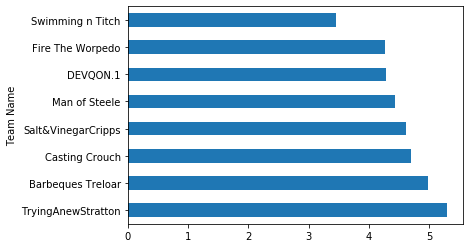

In [121]:
df_fixture_difficulty = df_fixture_combined.groupby('Team Name')['Opponent Rank'].agg('mean').sort_values(ascending=False)
plot_fixture_difficulty = df_fixture_difficulty.plot(kind='barh', x='Opponent Rank', y='Team Name')
plot_fixture_difficulty

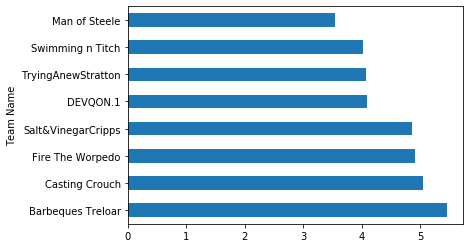

In [122]:
df_season_performance = df_fixture_combined.groupby('Team Name')['Rank'].agg('mean').sort_values(ascending=False)
plot_season_performance = df_season_performance.plot(kind='barh', x='Rank', y='Team Name')
plot_season_performance

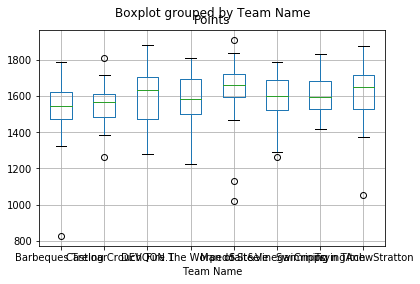

In [126]:
df_fixture_combined.boxplot(by='Team Name', column=['Points'])